# Data Preparation and Feature Creation

## Arthimetic Operations

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic=pd.read_csv('datasets/titanic.csv')

In [3]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [4]:
group_specific_age = titanic.groupby(['pclass','sex']).age.transform('mean').round(1)

In [5]:
titanic.age.fillna(group_specific_age,inplace=True)

In [6]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,26.5,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


## Add/Sub/Mul/Div of Columns

In [7]:
titanic.sibsp+titanic.parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [8]:
titanic.sibsp.add(titanic.parch)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [9]:
titanic['relatives'] = titanic.sibsp.add(titanic.parch) 

In [10]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,relatives
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,0
887,1,1,female,19.0,0,0,30.0000,S,B,0
888,0,3,female,21.8,1,2,23.4500,S,NaN,3
889,1,1,male,26.0,0,0,30.0000,C,C,0


In [11]:
sales = pd.read_csv('datasets/sales.csv',index_col=0)

In [12]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [13]:
sales.Mon.add(sales.Thu,fill_value=0)

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [14]:
sales['perc_bonus'] = [0.12,0.15,0.10,0.20]

In [15]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_bonus
Steven,34,27,15,NaN,33,0.12
Mike,45,9,74,87.0,12,0.15
Andi,17,33,54,8.0,29,0.10
Paul,87,67,27,45.0,7,0.20


In [16]:
sales.Thu.mul(sales.perc_bonus,fill_value=0)

Steven     0.00
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [17]:
sales.iloc[:,:-1].sum(axis=1).mul(sales.perc_bonus)

Steven    13.08
Mike      34.05
Andi      14.10
Paul      46.60
dtype: float64

In [18]:
sales['Bonus'] = sales.iloc[:,:-1].sum(axis=1).mul(sales.perc_bonus)

In [19]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_bonus,Bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


## Add/Mul/Sub/Div with Scalar Value

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,relatives
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [21]:
1912-titanic.age

0      1890.0
1      1874.0
2      1886.0
3      1877.0
4      1877.0
        ...  
886    1885.0
887    1893.0
888    1890.2
889    1886.0
890    1880.0
Name: age, Length: 891, dtype: float64

In [22]:
YoB=titanic.age.sub(1912, fill_value=0).mul(-1)

In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,relatives
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [24]:
titanic.insert(4,'YoB',YoB)

In [25]:
titanic

,survived,pclass,sex,age,YoB,sibsp,parch,fare,embarked,deck,relatives
0,0,3,male,22.0,1890.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1874.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,1886.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1877.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,1877.0,0,0,8.0500,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,1885.0,0,0,13.0000,S,NaN,0
887,1,1,female,19.0,1893.0,0,0,30.0000,S,B,0
888,0,3,female,21.8,1890.2,1,2,23.4500,S,NaN,3
889,1,1,male,26.0,1886.0,0,0,30.0000,C,C,0


In [26]:
fx_rate = 1.1

In [27]:
titanic['EUR_fare'] = titanic.fare.div(fx_rate)

In [28]:
titanic.head()

,survived,pclass,sex,age,YoB,sibsp,parch,fare,embarked,deck,relatives,EUR_fare
0,0,3,male,22.0,1890.0,1,0,7.2500,S,NaN,1,6.590909
1,1,1,female,38.0,1874.0,1,0,71.2833,C,C,1,64.803000
2,1,3,female,26.0,1886.0,0,0,7.9250,S,NaN,0,7.204545
3,1,1,female,35.0,1877.0,1,0,53.1000,S,C,1,48.272727
4,0,3,male,35.0,1877.0,0,0,8.0500,S,NaN,0,7.318182


In [29]:
titanic.drop(columns=['sibsp','parch','deck','YoB','EUR_fare'],inplace=True)

In [30]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [31]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_bonus,Bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


In [32]:
fixed_costs = 5

In [33]:
sales.iloc[:,:-2].sub(fixed_costs,fill_value=0)

,Mon,Tue,Wed,Thu,Fri
Steven,29,22,10,-5.0,28
Mike,40,4,69,82.0,7
Andi,12,28,49,3.0,24
Paul,82,62,22,40.0,2


In [34]:
perc_bonus=0.1

In [35]:
sales.iloc[:,:-2].mul(perc_bonus,fill_value=0)

,Mon,Tue,Wed,Thu,Fri
Steven,3.4,2.7,1.5,0.0,3.3
Mike,4.5,0.9,7.4,8.7,1.2
Andi,1.7,3.3,5.4,0.8,2.9
Paul,8.7,6.7,2.7,4.5,0.7


In [36]:
sales.iloc[:,:-2]

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [37]:
lot_size=10
bonus_per_lot=1.25

In [38]:
sales.iloc[:,:-2].floordiv(lot_size,fill_value=0).mul(bonus_per_lot).sum(axis=1)

Steven    11.25
Mike      25.00
Andi      13.75
Paul      25.00
dtype: float64

## Transformation/Mapping

In [39]:
summer = pd.read_csv('datasets/summer.csv')

In [40]:
sample =summer.sample(7,random_state=123).sort_values('Year')

In [41]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [42]:
host_country = {'Paris':'France',
                'Mexico':'Mexico',
               'Montreal':"Canada",
               "Moscow":"Russia",
               'Barcelona':'Spain',
               'Athens':'Greece'}

In [43]:
host_country

{'Paris': 'France',
 'Mexico': 'Mexico',
 'Montreal': 'Canada',
 'Moscow': 'Russia',
 'Barcelona': 'Spain',
 'Athens': 'Greece'}

In [44]:
sample.City.map(host_country)

4196     France
11961    Mexico
11742    Mexico
13996    Canada
16229    Russia
19728     Spain
25901    Greece
Name: City, dtype: object

In [45]:
sample['Host_Country'] = sample.City.map(host_country)

In [46]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Host_Country
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze,France
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold,Mexico
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold,Mexico
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver,Canada
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze,Russia
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver,Spain
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze,Greece


In [47]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [48]:
mapper= {1:"First",2:"Second",3:"Third"}

In [49]:
titanic.pclass.map(mapper)

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: pclass, Length: 891, dtype: object

In [50]:
titanic.pclass=titanic.pclass.map(mapper)

In [51]:
titanic

,survived,pclass,sex,age,fare,embarked,relatives
0,0,Third,male,22.0,7.2500,S,1
1,1,First,female,38.0,71.2833,C,1
2,1,Third,female,26.0,7.9250,S,0
3,1,First,female,35.0,53.1000,S,1
4,0,Third,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,Second,male,27.0,13.0000,S,0
887,1,First,female,19.0,30.0000,S,0
888,0,Third,female,21.8,23.4500,S,3
889,1,First,male,26.0,30.0000,C,0


## Conditional Transformation

In [52]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,relatives
0,0,Third,male,22.0,7.2500,S,1
1,1,First,female,38.0,71.2833,C,1
2,1,Third,female,26.0,7.9250,S,0
3,1,First,female,35.0,53.1000,S,1
4,0,Third,male,35.0,8.0500,S,0


In [53]:
titanic = pd.read_csv('datasets/titanic.csv')

In [54]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [55]:
titanic['number_of_relatives'] = titanic.sibsp.add(titanic.parch)

In [56]:
titanic.shape

(891, 10)

In [57]:
titanic[titanic.number_of_relatives == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,0,3,male,35.0,0,0,8.0500,S,NaN,0
5,0,3,male,NaN,0,0,8.4583,Q,NaN,0
6,0,1,male,54.0,0,0,51.8625,S,E,0
11,1,1,female,58.0,0,0,26.5500,S,C,0
...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,NaN,0
886,0,2,male,27.0,0,0,13.0000,S,NaN,0
887,1,1,female,19.0,0,0,30.0000,S,B,0
889,1,1,male,26.0,0,0,30.0000,C,C,0


In [58]:
np.where(titanic.number_of_relatives==0)

(array([  2,   4,   5,   6,  11,  12,  14,  15,  17,  19,  20,  21,  22,
         23,  26,  28,  29,  30,  32,  33,  36,  37,  42,  44,  45,  47,
         51,  55,  56,  57,  60,  61,  64,  66,  67,  70,  72,  74,  75,
         76,  77,  79,  80,  81,  82,  83,  84,  87,  89,  90,  91,  94,
         95,  96, 100, 101, 103, 105, 106, 107, 108, 110, 112, 114, 115,
        116, 121, 123, 126, 127, 129, 130, 131, 134, 135, 138, 139, 141,
        143, 144, 146, 149, 150, 152, 154, 156, 157, 158, 161, 162, 163,
        168, 169, 170, 173, 174, 177, 178, 179, 181, 185, 187, 189, 190,
        191, 194, 195, 196, 198, 199, 200, 202, 203, 204, 207, 208, 209,
        210, 211, 212, 213, 216, 218, 219, 220, 221, 222, 223, 225, 226,
        227, 228, 231, 232, 234, 235, 238, 239, 242, 243, 244, 246, 250,
        252, 256, 257, 258, 260, 263, 264, 265, 269, 270, 271, 274, 276,
        277, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 292,
        293, 294, 295, 296, 298, 300, 302, 303, 304

In [59]:
np.where(titanic.number_of_relatives==0,'Yes','No')

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',

In [60]:
titanic['alone']=pd.Series(np.where(titanic.number_of_relatives==0,'Yes','No'))

In [61]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No
1,1,1,female,38.0,1,0,71.2833,C,C,1,No
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes
3,1,1,female,35.0,1,0,53.1000,S,C,1,No
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,0,Yes
887,1,1,female,19.0,0,0,30.0000,S,B,0,Yes
888,0,3,female,NaN,1,2,23.4500,S,NaN,3,No
889,1,1,male,26.0,0,0,30.0000,C,C,0,Yes


In [62]:
titanic['child'] = pd.Series(np.where(titanic.age<18,'Yes',"No"))

In [63]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No,No
1,1,1,female,38.0,1,0,71.2833,C,C,1,No,No
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes,No
3,1,1,female,35.0,1,0,53.1000,S,C,1,No,No
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes,No


## Discretization and Binning with pd.cut()

In [64]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No,No
1,1,1,female,38.0,1,0,71.2833,C,C,1,No,No
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes,No
3,1,1,female,35.0,1,0,53.1000,S,C,1,No,No
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes,No


In [65]:
titanic.groupby(['alone']).child.count()

alone
No     354
Yes    537
Name: child, dtype: int64

In [66]:
age_bins = [0, 10, 18, 30, 55, 100]

In [67]:
cats = pd.cut(titanic.age, age_bins, right=False)

In [68]:
cats

0      [18.0, 30.0)
1      [30.0, 55.0)
2      [18.0, 30.0)
3      [30.0, 55.0)
4      [30.0, 55.0)
           ...     
886    [18.0, 30.0)
887    [18.0, 30.0)
888             NaN
889    [18.0, 30.0)
890    [30.0, 55.0)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, left]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [69]:
titanic['age_cat'] = cats

In [70]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child,age_cat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No,No,"[18, 30)"
1,1,1,female,38.0,1,0,71.2833,C,C,1,No,No,"[30, 55)"
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,"[18, 30)"
3,1,1,female,35.0,1,0,53.1000,S,C,1,No,No,"[30, 55)"
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,"[30, 55)"


In [71]:
titanic.groupby('age_cat').survived.mean()*100

age_cat
[0, 10)      61.290323
[10, 18)     45.098039
[18, 30)     35.055351
[30, 55)     42.013889
[55, 100)    30.952381
Name: survived, dtype: float64

In [72]:
pd.crosstab(titanic.survived, titanic.age_cat, values='count',aggfunc='count')

age_cat,"[0, 10)","[10, 18)","[18, 30)","[30, 55)","[55, 100)"
survived,,,,,
0,24,28,176,167,29
1,38,23,95,121,13


In [73]:
pd.crosstab(titanic.survived, titanic.age_cat,margins=True)

age_cat,"[0, 10)","[10, 18)","[18, 30)","[30, 55)","[55, 100)",All
survived,,,,,,
0,24,28,176,167,29,424
1,38,23,95,121,13,290
All,62,51,271,288,42,714


In [74]:
pd.crosstab(titanic.survived, titanic.age_cat,margins=True,normalize=True)*100

age_cat,"[0, 10)","[10, 18)","[18, 30)","[30, 55)","[55, 100)",All
survived,,,,,,
0,3.361345,3.921569,24.649860,23.389356,4.061625,59.383754
1,5.322129,3.221289,13.305322,16.946779,1.820728,40.616246
All,8.683473,7.142857,37.955182,40.336134,5.882353,100.000000


In [75]:
group_specific_age = titanic.groupby(['pclass','sex']).age.transform('mean')

In [76]:
titanic.age.fillna(group_specific_age,inplace=True)

In [77]:
titanic.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child,age_cat
0,0,3,male,22.000000,1,0,7.2500,S,NaN,1,No,No,"[18.0, 30.0)"
1,1,1,female,38.000000,1,0,71.2833,C,C,1,No,No,"[30.0, 55.0)"
2,1,3,female,26.000000,0,0,7.9250,S,NaN,0,Yes,No,"[18.0, 30.0)"
3,1,1,female,35.000000,1,0,53.1000,S,C,1,No,No,"[30.0, 55.0)"
4,0,3,male,35.000000,0,0,8.0500,S,NaN,0,Yes,No,"[30.0, 55.0)"
5,0,3,male,26.507589,0,0,8.4583,Q,NaN,0,Yes,No,NaN


In [78]:
pd.crosstab(titanic.survived, titanic.age_cat,
            values=titanic.age,aggfunc='count',
           margins=True)

age_cat,"[0, 10)","[10, 18)","[18, 30)","[30, 55)","[55, 100)",All
survived,,,,,,
0,24,28,176,167,29,424
1,38,23,95,121,13,290
All,62,51,271,288,42,714


In [79]:
pd.crosstab(titanic.survived, titanic.age_cat,
            values=titanic.age,aggfunc='count',
           margins=True,normalize=True)*100

age_cat,"[0, 10)","[10, 18)","[18, 30)","[30, 55)","[55, 100)",All
survived,,,,,,
0,3.361345,3.921569,24.649860,23.389356,4.061625,59.383754
1,5.322129,3.221289,13.305322,16.946779,1.820728,40.616246
All,8.683473,7.142857,37.955182,40.336134,5.882353,100.000000


In [80]:
group_names = ['child','teenager','young_adult','adult','elderly']

In [81]:
age_group_names= pd.cut(titanic.age, age_bins, right=False,labels=group_names)

In [82]:
titanic['age_cat'] = age_group_names

In [83]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child,age_cat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult
1,1,1,female,38.0,1,0,71.2833,C,C,1,No,No,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult
3,1,1,female,35.0,1,0,53.1000,S,C,1,No,No,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult


In [84]:
titanic.age_cat.value_counts(normalize=True)*100

young_adult    45.903479
adult          36.700337
child           6.958474
teenager        5.723906
elderly         4.713805
Name: age_cat, dtype: float64

In [85]:
titanic.age_cat.value_counts()

young_adult    409
adult          327
child           62
teenager        51
elderly         42
Name: age_cat, dtype: int64

In [86]:
titanic.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [87]:
pd.cut(titanic.fare,50,precision=0).value_counts().sort_index()

(-1.0, 10.0]      337
(10.0, 20.0]      182
(20.0, 31.0]      147
(31.0, 41.0]       50
(41.0, 51.0]       16
(51.0, 61.0]       39
(61.0, 72.0]       18
(72.0, 82.0]       29
(82.0, 92.0]       18
(92.0, 102.0]       2
(102.0, 113.0]      8
(113.0, 123.0]      7
(123.0, 133.0]      0
(133.0, 143.0]      7
(143.0, 154.0]      9
(154.0, 164.0]      0
(164.0, 174.0]      2
(174.0, 184.0]      0
(184.0, 195.0]      0
(195.0, 205.0]      0
(205.0, 215.0]      4
(215.0, 225.0]      1
(225.0, 236.0]      4
(236.0, 246.0]      0
(246.0, 256.0]      2
(256.0, 266.0]      6
(266.0, 277.0]      0
(277.0, 287.0]      0
(287.0, 297.0]      0
(297.0, 307.0]      0
(307.0, 318.0]      0
(318.0, 328.0]      0
(328.0, 338.0]      0
(338.0, 348.0]      0
(348.0, 359.0]      0
(359.0, 369.0]      0
(369.0, 379.0]      0
(379.0, 389.0]      0
(389.0, 400.0]      0
(400.0, 410.0]      0
(410.0, 420.0]      0
(420.0, 430.0]      0
(430.0, 441.0]      0
(441.0, 451.0]      0
(451.0, 461.0]      0
(461.0, 47

In [88]:
pd.cut(titanic.age,10,precision=0).value_counts().sort_index()

(0.0, 8.0]       54
(8.0, 16.0]      46
(16.0, 24.0]    219
(24.0, 32.0]    274
(32.0, 40.0]    127
(40.0, 48.0]     91
(48.0, 56.0]     45
(56.0, 64.0]     24
(64.0, 72.0]      9
(72.0, 80.0]      2
Name: age, dtype: int64

In [89]:
pd.cut(titanic.age,10,precision=0).value_counts(normalize=True).sort_index()*100

(0.0, 8.0]       6.060606
(8.0, 16.0]      5.162738
(16.0, 24.0]    24.579125
(24.0, 32.0]    30.751964
(32.0, 40.0]    14.253648
(40.0, 48.0]    10.213244
(48.0, 56.0]     5.050505
(56.0, 64.0]     2.693603
(64.0, 72.0]     1.010101
(72.0, 80.0]     0.224467
Name: age, dtype: float64

## Discretization and Binning with pd.qcut()

In [90]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child,age_cat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult
1,1,1,female,38.0,1,0,71.2833,C,C,1,No,No,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult
3,1,1,female,35.0,1,0,53.1000,S,C,1,No,No,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult


In [91]:
pd.qcut(titanic.fare,5).value_counts().sort_index()

(-0.001, 7.854]      179
(7.854, 10.5]        184
(10.5, 21.679]       172
(21.679, 39.688]     180
(39.688, 512.329]    176
Name: fare, dtype: int64

<AxesSubplot:>

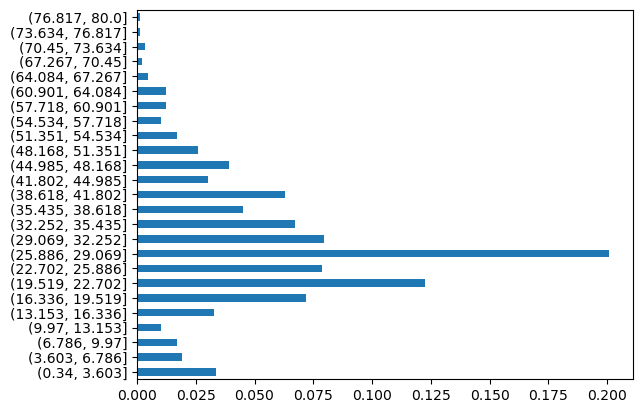

In [92]:
pd.cut(titanic.age,25).value_counts(normalize=True).sort_index().plot(kind='barh')

In [93]:
quantiles=[0, 0.1, 0.25, 0.5, 0.9, 1]

In [94]:
fare_labels= ['very_cheap','cheap','moderate','exp','very_exp']

In [95]:
titanic['fare_cat'] = pd.qcut(titanic.fare, quantiles, precision=0,
                             labels=fare_labels)

In [96]:
titanic.groupby(['age_cat','fare_cat']).survived.mean().unstack()

fare_cat,very_cheap,cheap,moderate,exp,very_exp
age_cat,,,,,
child,NaN,NaN,0.875000,0.568627,0.666667
teenager,0.333333,0.500000,0.500000,0.263158,1.000000
young_adult,0.207547,0.269231,0.214286,0.462185,0.619048
adult,0.000000,0.050000,0.337500,0.472603,0.800000
elderly,0.000000,0.000000,0.250000,0.272727,0.714286


In [97]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child,age_cat,fare_cat
0,0,3,male,22.000000,1,0,7.2500,S,NaN,1,No,No,young_adult,very_cheap
1,1,1,female,38.000000,1,0,71.2833,C,C,1,No,No,adult,exp
2,1,3,female,26.000000,0,0,7.9250,S,NaN,0,Yes,No,young_adult,moderate
3,1,1,female,35.000000,1,0,53.1000,S,C,1,No,No,adult,exp
4,0,3,male,35.000000,0,0,8.0500,S,NaN,0,Yes,No,adult,moderate
5,0,3,male,26.507589,0,0,8.4583,Q,NaN,0,Yes,No,young_adult,moderate
6,0,1,male,54.000000,0,0,51.8625,S,E,0,Yes,No,adult,exp
7,0,3,male,2.000000,3,1,21.0750,S,NaN,4,No,Yes,child,exp
8,1,3,female,27.000000,0,2,11.1333,S,NaN,2,No,No,young_adult,moderate
9,1,2,female,14.000000,1,0,30.0708,C,NaN,1,No,Yes,teenager,exp


## Caps and Floors

In [98]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child,age_cat,fare_cat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,very_cheap
1,1,1,female,38.0,1,0,71.2833,C,C,1,No,No,adult,exp
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,moderate
3,1,1,female,35.0,1,0,53.1000,S,C,1,No,No,adult,exp
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,moderate


In [99]:
import matplotlib.pyplot as plt

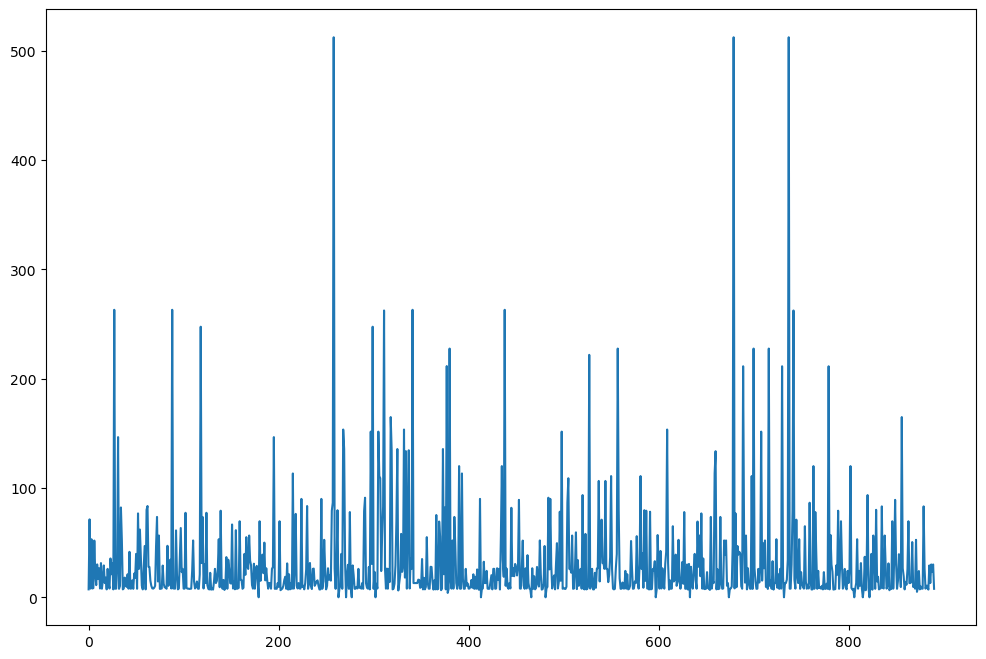

In [102]:
titanic.fare.plot(figsize=(12,8))
plt.show()

In [103]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [104]:
titanic.fare.sort_values(ascending=False)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: fare, Length: 891, dtype: float64

In [106]:
fare_cap = 250

In [111]:
titanic.loc[titanic.fare>fare_cap,'fare'] = fare_cap

In [112]:
fare_floor = 5

In [116]:
titanic.loc[titanic.fare < fare_floor,'fare'] = fare_floor

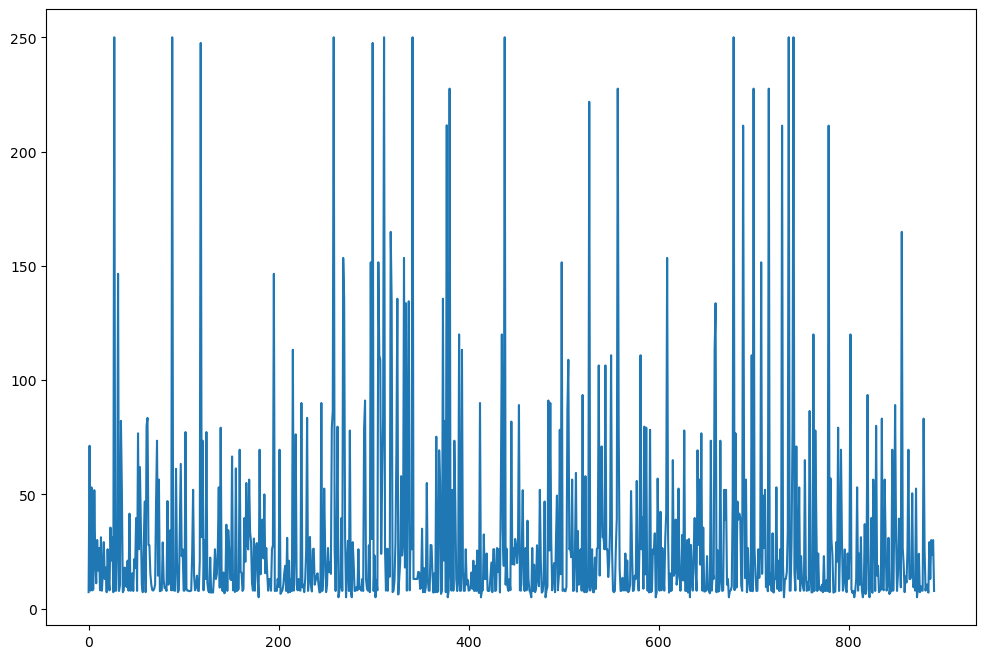

In [122]:
titanic.fare.plot(figsize=(12,8))
plt.show()

In [123]:
titanic.fare.describe()

count    891.000000
mean      31.320089
std       42.517981
min        5.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      250.000000
Name: fare, dtype: float64

## Scaling / Standardization

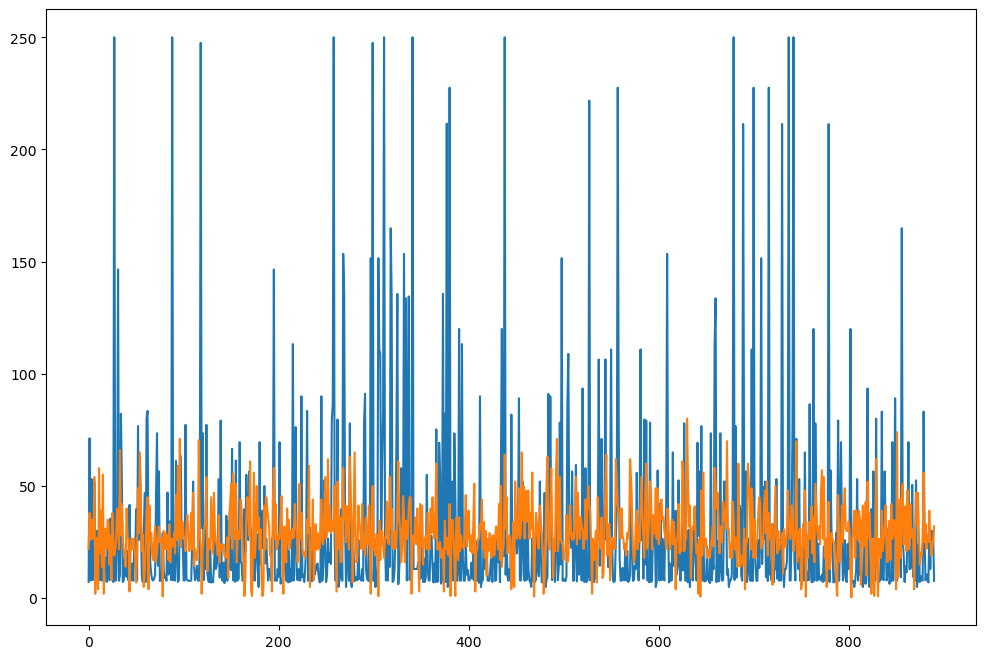

In [126]:
titanic.fare.plot(figsize=(12,8))
titanic.age.plot(figsize=(12,8))
plt.show()

In [127]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,number_of_relatives
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.318643,0.523008,0.381594,31.320089,0.904602
std,0.486592,0.836071,13.281103,1.102743,0.806057,42.517981,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,250.000000,10.000000


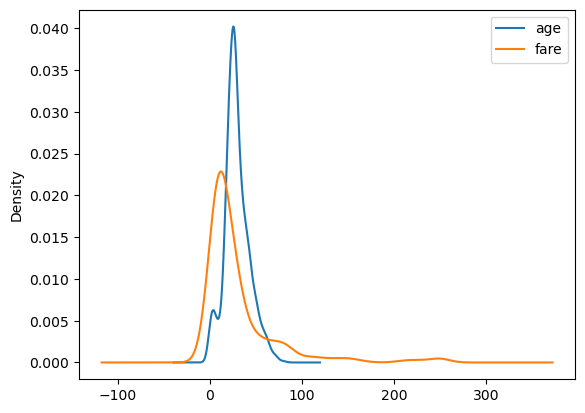

In [133]:
titanic.age.plot(kind='kde')
titanic.fare.plot(kind='kde')
plt.legend()

In [136]:
mean_age = titanic.age.mean()
mean_fare = titanic.fare.mean()

In [137]:
std_age = titanic.age.std()
std_fare = titanic.fare.std()

In [140]:
titanic['age_zscore'] = (titanic.age - mean_age)/std_age
titanic['fare_zscore'] = (titanic.fare - mean_fare)/std_fare

In [141]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child,age_cat,fare_cat,age_zscore,fare_zscore
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,very_cheap,-0.551057,-0.566116
1,1,1,female,38.0,1,0,71.2833,C,C,1,No,No,adult,exp,0.653662,0.939913
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,moderate,-0.249877,-0.550240
3,1,1,female,35.0,1,0,53.1000,S,C,1,No,No,adult,exp,0.427778,0.512252
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,moderate,0.427778,-0.547300


In [142]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child,age_cat,fare_cat,age_zscore,fare_zscore
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,very_cheap,-0.551057,-0.566116
1,1,1,female,38.0,1,0,71.2833,C,C,1,No,No,adult,exp,0.653662,0.939913
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,moderate,-0.249877,-0.550240
3,1,1,female,35.0,1,0,53.1000,S,C,1,No,No,adult,exp,0.427778,0.512252
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,moderate,0.427778,-0.547300


In [144]:
round(titanic.describe(),2)

,survived,pclass,age,sibsp,parch,fare,number_of_relatives,age_zscore,fare_zscore
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,29.32,0.52,0.38,31.32,0.90,0.00,0.00
std,0.49,0.84,13.28,1.10,0.81,42.52,1.61,1.00,1.00
min,0.00,1.00,0.42,0.00,0.00,5.00,0.00,-2.18,-0.62
25%,0.00,2.00,21.75,0.00,0.00,7.91,0.00,-0.57,-0.55
50%,0.00,3.00,26.51,0.00,0.00,14.45,0.00,-0.21,-0.40
75%,1.00,3.00,36.00,1.00,0.00,31.00,1.00,0.50,-0.01
max,1.00,3.00,80.00,8.00,6.00,250.00,10.00,3.82,5.14


In [145]:
mean_age, mean_fare

(29.31864271664414, 31.32008888888885)

## Creating Dummy Variables

In [168]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,number_of_relatives,alone,child,age_cat,fare_cat,age_zscore,fare_zscore
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,very_cheap,-0.551057,-0.566116
1,1,1,female,38.0,1,0,71.2833,C,C,1,No,No,adult,exp,0.653662,0.939913
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,moderate,-0.249877,-0.550240
3,1,1,female,35.0,1,0,53.1000,S,C,1,No,No,adult,exp,0.427778,0.512252
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,moderate,0.427778,-0.547300


In [171]:
titanic.drop(labels=['age','alone','child','sibsp','parch',
                     'age_zscore','fare_zscore','fare_cat'],
            axis=1,inplace=True)

In [172]:
titanic.head()

,survived,pclass,sex,fare,embarked,deck,number_of_relatives,age_cat
0,0,3,male,7.2500,S,NaN,1,young_adult
1,1,1,female,71.2833,C,C,1,adult
2,1,3,female,7.9250,S,NaN,0,young_adult
3,1,1,female,53.1000,S,C,1,adult
4,0,3,male,8.0500,S,NaN,0,adult


In [179]:
titanic_d = pd.get_dummies(titanic,columns=['sex','pclass','embarked','age_cat'],drop_first=True)

In [181]:
titanic_d.describe()

,survived,fare,number_of_relatives,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S,age_cat_teenager,age_cat_young_adult,age_cat_adult,age_cat_elderly
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,31.320089,0.904602,0.647587,0.206510,0.551066,0.086420,0.722783,0.057239,0.459035,0.367003,0.047138
std,0.486592,42.517981,1.613459,0.477990,0.405028,0.497665,0.281141,0.447876,0.232429,0.498599,0.482258,0.212053
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,250.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survived             891 non-null    int64  
 1   fare                 891 non-null    float64
 2   deck                 203 non-null    object 
 3   number_of_relatives  891 non-null    int64  
 4   sex_male             891 non-null    uint8  
 5   pclass_2             891 non-null    uint8  
 6   pclass_3             891 non-null    uint8  
 7   embarked_Q           891 non-null    uint8  
 8   embarked_S           891 non-null    uint8  
 9   age_cat_teenager     891 non-null    uint8  
 10  age_cat_young_adult  891 non-null    uint8  
 11  age_cat_adult        891 non-null    uint8  
 12  age_cat_elderly      891 non-null    uint8  
dtypes: float64(1), int64(2), object(1), uint8(9)
memory usage: 35.8+ KB


## String Operations

In [183]:
summer = pd.read_csv('datasets/summer.csv')

In [184]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [187]:
summer.Athlete = summer.Athlete.str.title()

In [188]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [210]:
summer.Athlete.str.split(', ',n=1,expand=True)

,0,1
0,Hajos,Alfred
1,Herschmann,Otto
2,Drivas,Dimitrios
3,Malokinis,Ioannis
4,Chasapis,Spiridon
...,...,...
31160,Janikowski,Damian
31161,Rezaei,Ghasem Gholamreza
31162,Totrov,Rustam
31163,Aleksanyan,Artur


In [211]:
summer[['Surname','First_Name']] = summer.Athlete.str.split(', ',n=1,expand=True)

In [216]:
summer.drop(columns='Athlete',axis=0,inplace=True)

In [219]:
summer['First_Name'] = summer.First_Name.str.strip()

In [222]:
summer.Surname = summer.Surname.str.strip()

In [223]:
summer

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze,Janikowski,Damian
31161,2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold,Rezaei,Ghasem Gholamreza
31162,2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver,Totrov,Rustam
31163,2012,London,Wrestling,Wrestling Freestyle,ARM,Men,Wg 96 KG,Bronze,Aleksanyan,Artur
